In [78]:
import pandas as pd
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# Load the CSV file
file_path = r"C:\Users\ashvi\OneDrive\Desktop\Reggae\San Diego Taxpayer\pivoted_and_PIT.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,City,Year,bridge to housing network,emergency shelter,family reunification program,flexible funds,food and nutrition,homeless services,homelessness prevention,homeshare program,...,service center,staff and operations,take back the streets,transitional housing,work for hope,Total PEH,Unsheltered PEH,Population,"PEH Per 100,000","Unsheltered Per 100,000"
0,Carlsbad,2017,0.0,14896.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,210,152,115518,181.789851,131.581225
1,Carlsbad,2018,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,122472.0,0.0,0.0,0.0,161,102,115382,139.536496,88.402004
2,Carlsbad,2019,0.0,0.0,0.0,0.0,0.0,20000.00,0.0,0.0,...,0.0,122472.0,0.0,0.0,0.0,148,94,114747,128.979407,81.919353
3,Carlsbad,2021,0.0,52574.0,0.0,0.0,0.0,419583.25,0.0,0.0,...,204217.0,40000.0,0.0,0.0,0.0,118,75,114160,103.363700,65.697267
4,Carlsbad,2022,0.0,202698.0,0.0,0.0,0.0,29825.00,0.0,0.0,...,204217.0,180000.0,0.0,0.0,0.0,103,60,113792,90.516029,52.727784


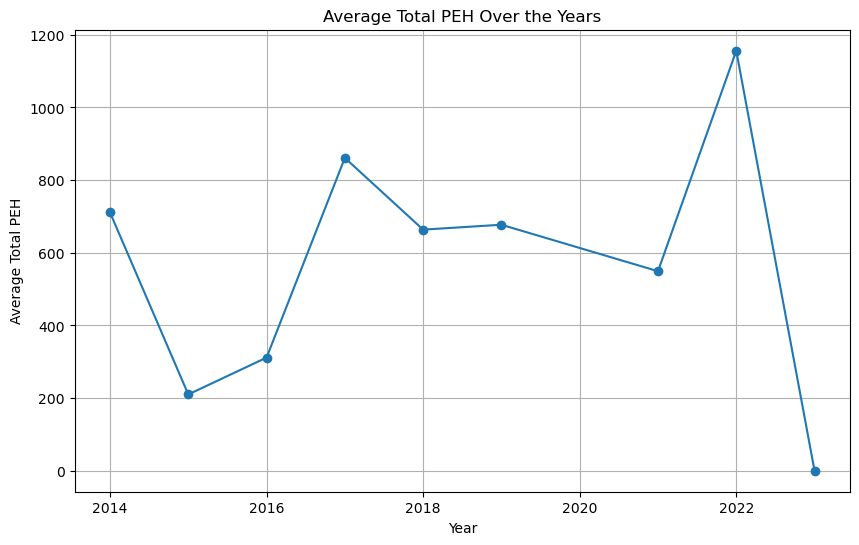

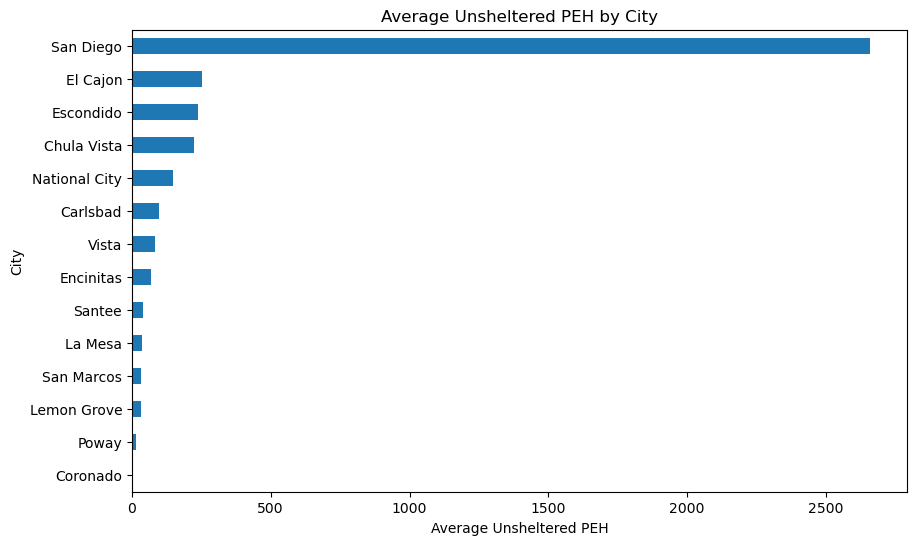

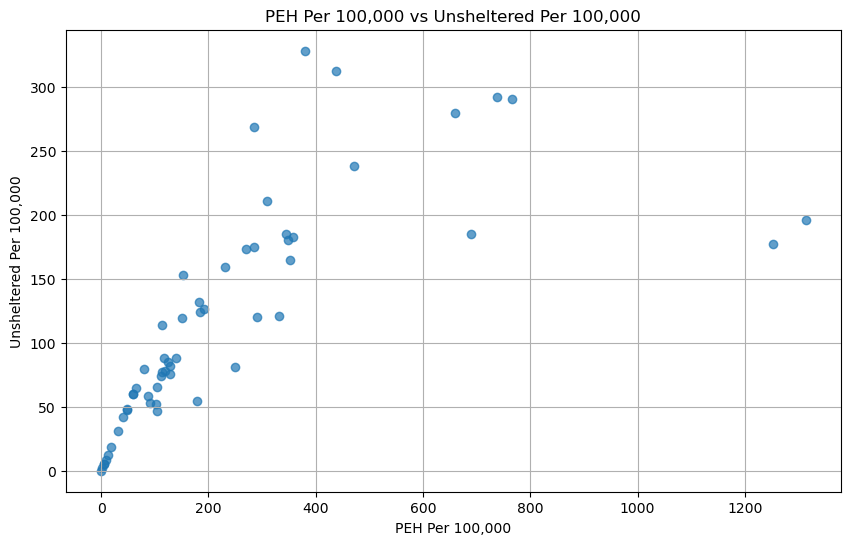

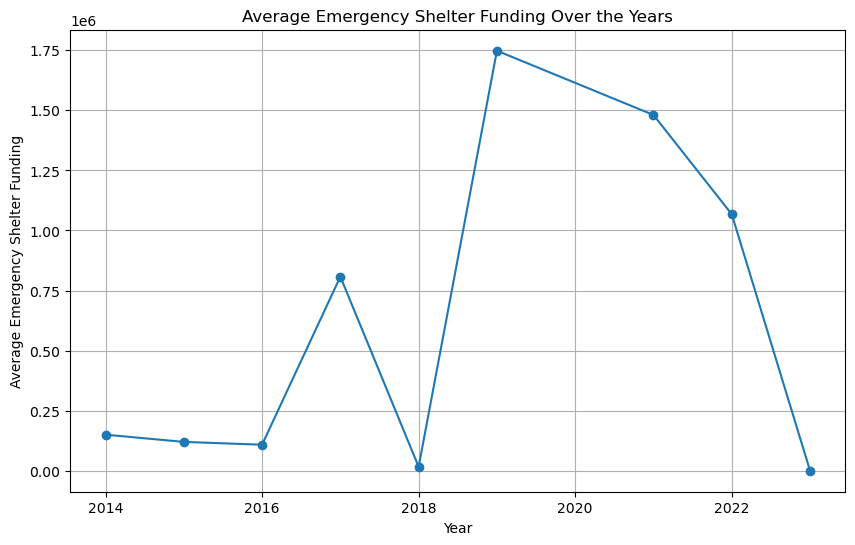

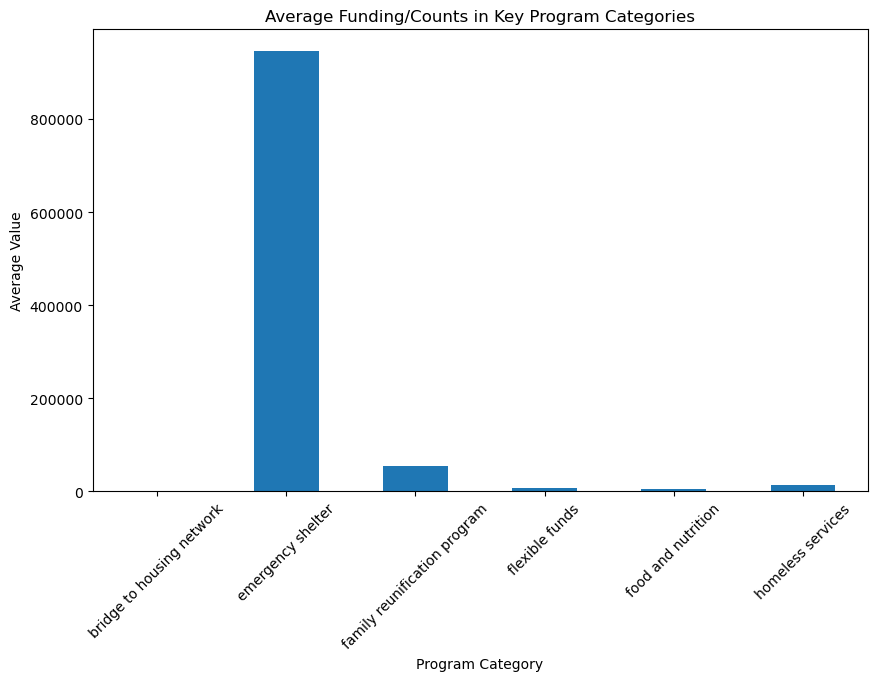

In [7]:
# 1. Total PEH Over the Years
plt.figure(figsize=(10, 6))
data.groupby('Year')['Total PEH'].mean().plot(kind='line', marker='o')
plt.title('Average Total PEH Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total PEH')
plt.grid(True)
plt.show()

# 2. Unsheltered PEH by City
plt.figure(figsize=(10, 6))
data.groupby('City')['Unsheltered PEH'].mean().sort_values().plot(kind='barh')
plt.title('Average Unsheltered PEH by City')
plt.xlabel('Average Unsheltered PEH')
plt.ylabel('City')
plt.show()

# 3. PEH Per 100,000 vs Unsheltered Per 100,000
plt.figure(figsize=(10, 6))
plt.scatter(data['PEH Per 100,000'], data['Unsheltered Per 100,000'], alpha=0.7)
plt.title('PEH Per 100,000 vs Unsheltered Per 100,000')
plt.xlabel('PEH Per 100,000')
plt.ylabel('Unsheltered Per 100,000')
plt.grid(True)
plt.show()

# 4. Emergency Shelter Funding Over the Years
plt.figure(figsize=(10, 6))
data.groupby('Year')['emergency shelter'].mean().plot(kind='line', marker='o')
plt.title('Average Emergency Shelter Funding Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Emergency Shelter Funding')
plt.grid(True)
plt.show()

# 5. Comparison of Key Program Categories
program_categories = ['bridge to housing network', 'emergency shelter', 'family reunification program', 
                      'flexible funds', 'food and nutrition', 'homeless services']
plt.figure(figsize=(10, 6))
data[program_categories].mean().plot(kind='bar')
plt.title('Average Funding/Counts in Key Program Categories')
plt.xlabel('Program Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

In [13]:
# List of program categories to check
program_categories = [
    'bridge to housing network', 'emergency shelter', 'family reunification program', 
    'flexible funds', 'food and nutrition', 'homeless services', 'homelessness prevention', 
    'homeshare program', 'outreach', 'rental assistance', 'service center', 
    'staff and operations', 'take back the streets', 'transitional housing', 'work for hope'
]

# Create a DataFrame with boolean values showing whether each city receives funding for each program
funding_by_city = data.groupby('City')[program_categories].apply(lambda x: x.gt(0).any()).astype(bool)

# Display the resulting DataFrame
funding_by_city

,bridge to housing network,emergency shelter,family reunification program,flexible funds,food and nutrition,homeless services,homelessness prevention,homeshare program,outreach,rental assistance,service center,staff and operations,take back the streets,transitional housing,work for hope
City,,,,,,,,,,,,,,,
Carlsbad,False,True,False,False,False,True,False,False,True,True,True,True,False,False,False
Chula Vista,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True
Coronado,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
El Cajon,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False
Encinitas,True,True,False,False,True,False,True,False,False,False,False,True,False,False,False
Escondido,False,True,False,False,False,False,True,False,True,True,False,True,False,False,False
La Mesa,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
Lemon Grove,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
National City,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False


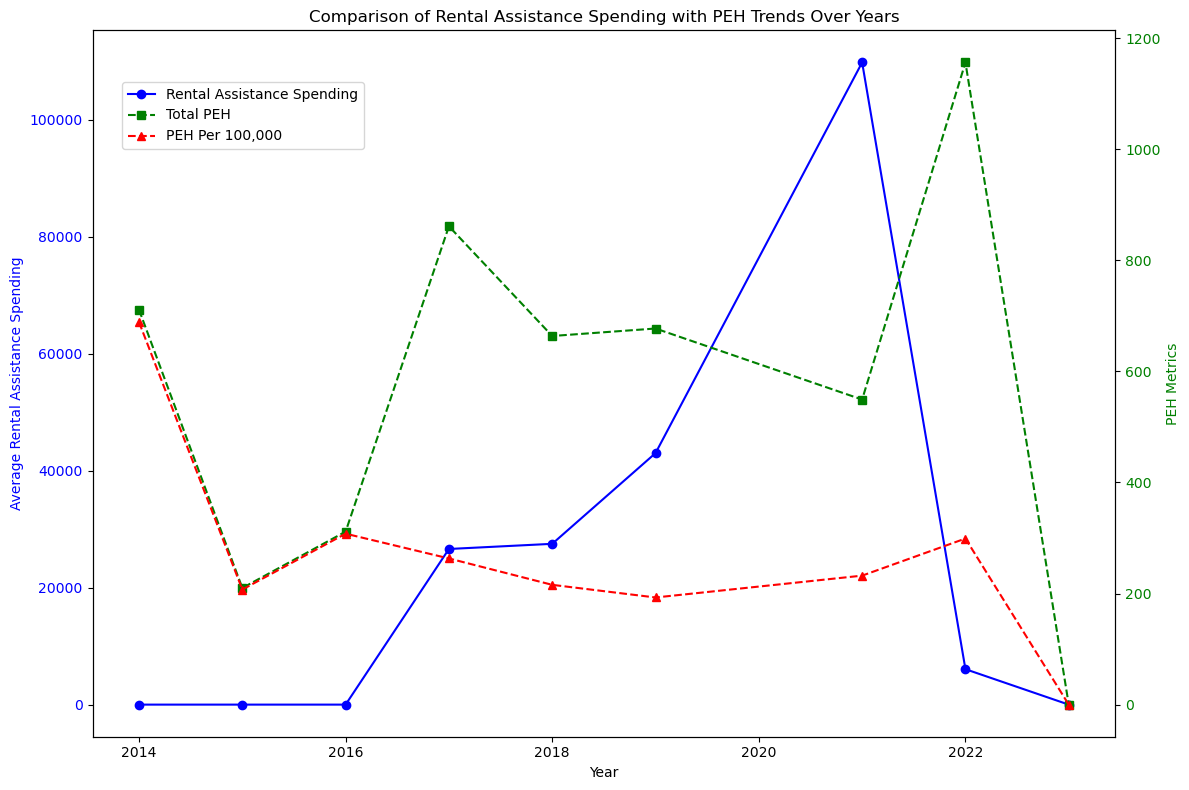

In [15]:
# Grouping the data by 'Year' to get the mean values for 'rental assistance', 'Total PEH', and 'PEH Per 100,000'
# This will help in visualizing rental assistance spending against homelessness metrics
rental_peh_trends = data.groupby('Year').agg({
    'rental assistance': 'mean',
    'Total PEH': 'mean',
    'PEH Per 100,000': 'mean'
})

# Plotting Rental Assistance, Total PEH, and PEH Per 100,000 trends over the years
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Rental Assistance spending on the primary y-axis
ax1.set_title("Comparison of Rental Assistance Spending with PEH Trends Over Years")
ax1.plot(rental_peh_trends.index, rental_peh_trends['rental assistance'], color="blue", marker='o', label="Rental Assistance Spending")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Rental Assistance Spending", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Setting up secondary y-axis for PEH trends
ax2 = ax1.twinx()
ax2.plot(rental_peh_trends.index, rental_peh_trends['Total PEH'], color="green", marker='s', linestyle='--', label="Total PEH")
ax2.plot(rental_peh_trends.index, rental_peh_trends['PEH Per 100,000'], color="red", marker='^', linestyle='--', label="PEH Per 100,000")
ax2.set_ylabel("PEH Metrics", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Adding legends for clarity
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.show()


In [32]:
# Define columns that are not program categories
non_program_columns = ['City', 'Year', 'Population', 'Total PEH', 'Unsheltered PEH', 'PEH Per 100,000', 'Unsheltered Per 100,000']

# Identify program categories by excluding non-program columns
program_categories = [col for col in data.columns if col not in non_program_columns]

# Create a DataFrame with boolean values showing whether each city receives funding for each program
funding_by_city = data.groupby('City')[program_categories].apply(lambda x: x.gt(0).any()).astype(bool)

# Display the boolean DataFrame
funding_by_city


,bridge to housing network,emergency shelter,family reunification program,flexible funds,food and nutrition,homeless services,homelessness prevention,homeshare program,housing assistance,housing navigation services,...,project h.o.p.e.,rapid re housing,rental assistance,restrooms,safe parking,service center,staff and operations,take back the streets,transitional housing,work for hope
City,,,,,,,,,,,,,,,,,,,,,
Carlsbad,False,True,False,False,False,True,False,False,True,False,...,False,True,True,True,False,True,True,False,False,False
Chula Vista,False,True,False,False,False,True,False,False,False,False,...,True,True,True,False,False,False,False,True,False,True
Coronado,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
El Cajon,False,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Encinitas,True,True,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
Escondido,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
La Mesa,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Lemon Grove,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
National City,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


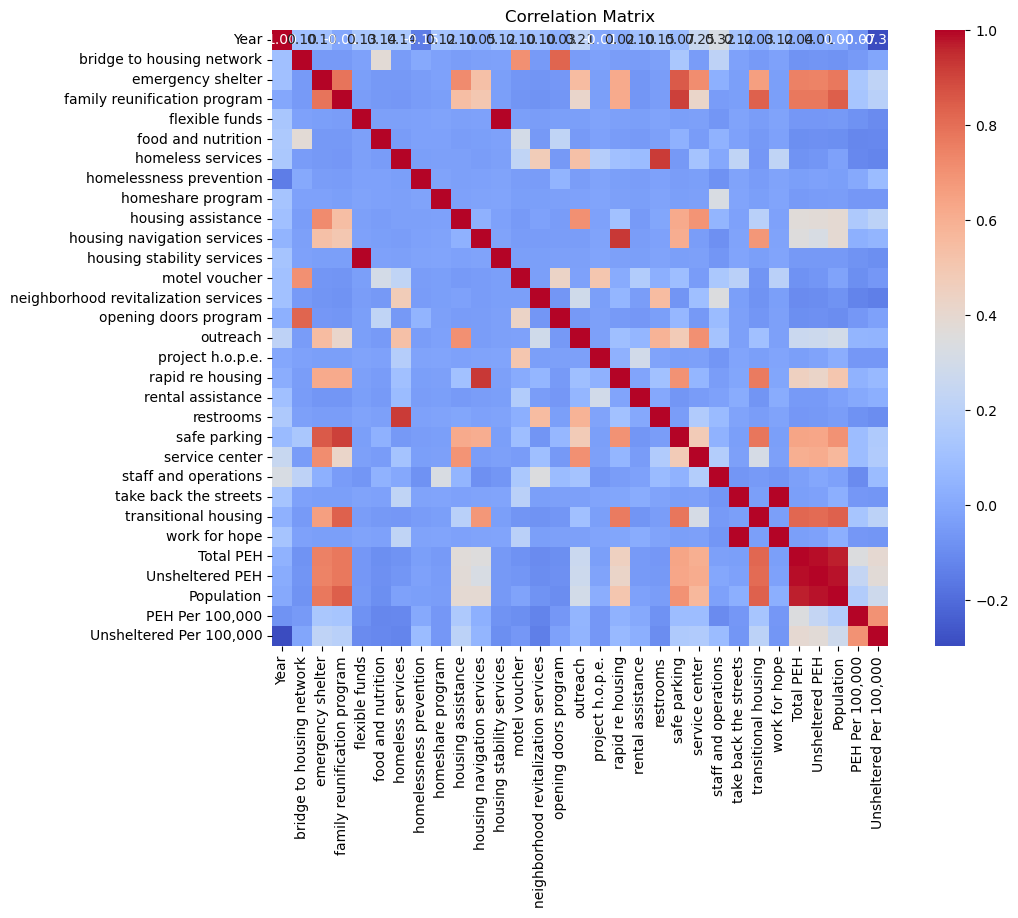

In [40]:
# Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

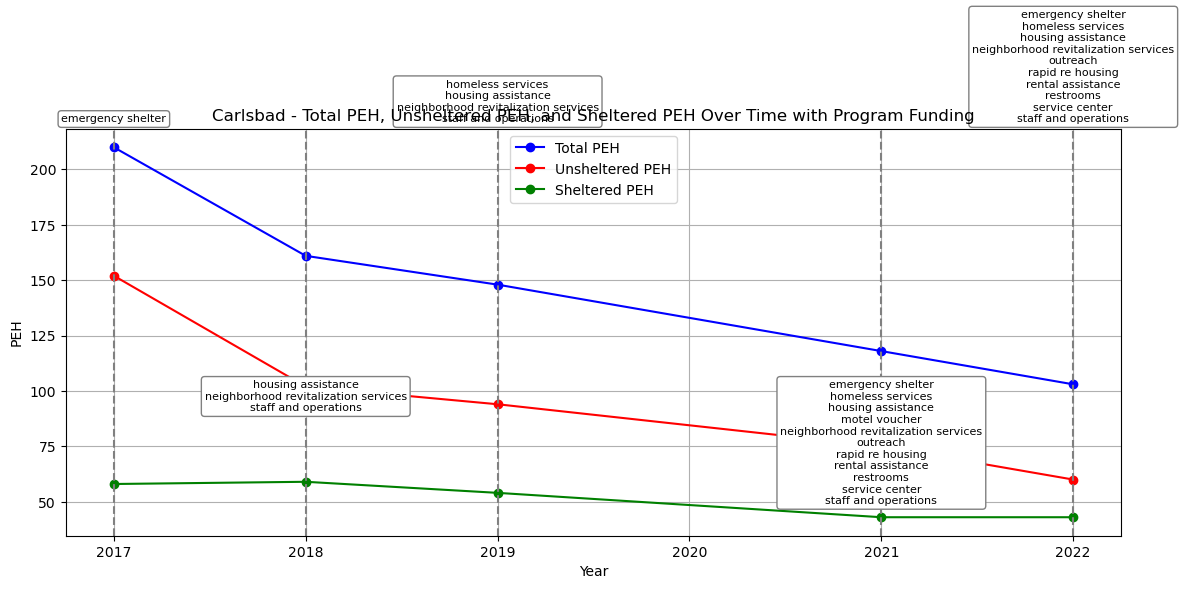

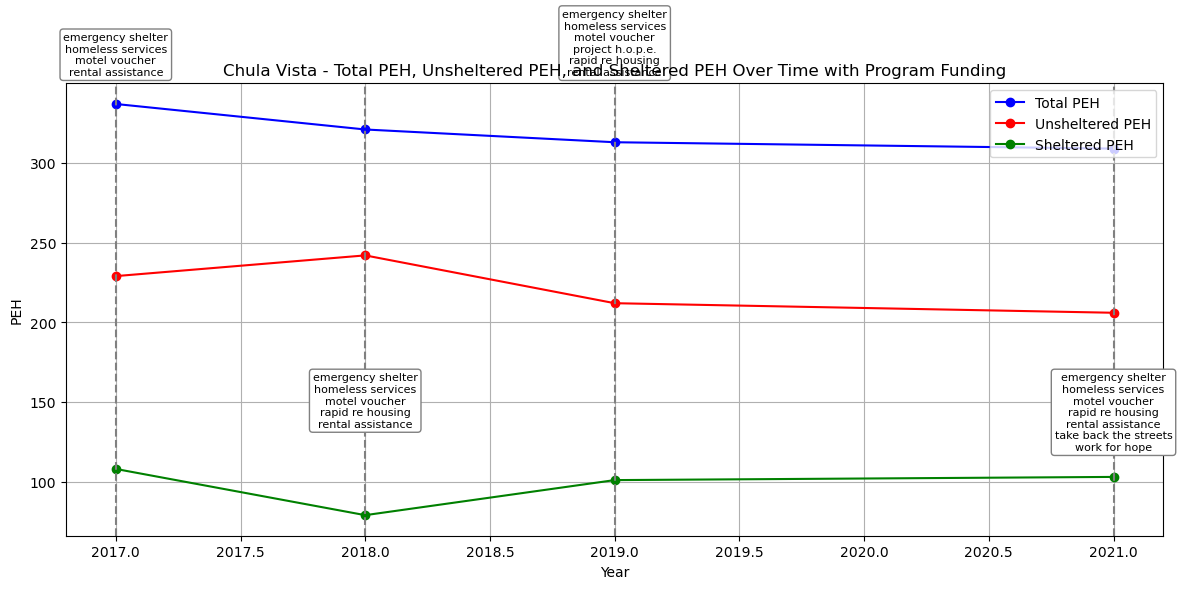

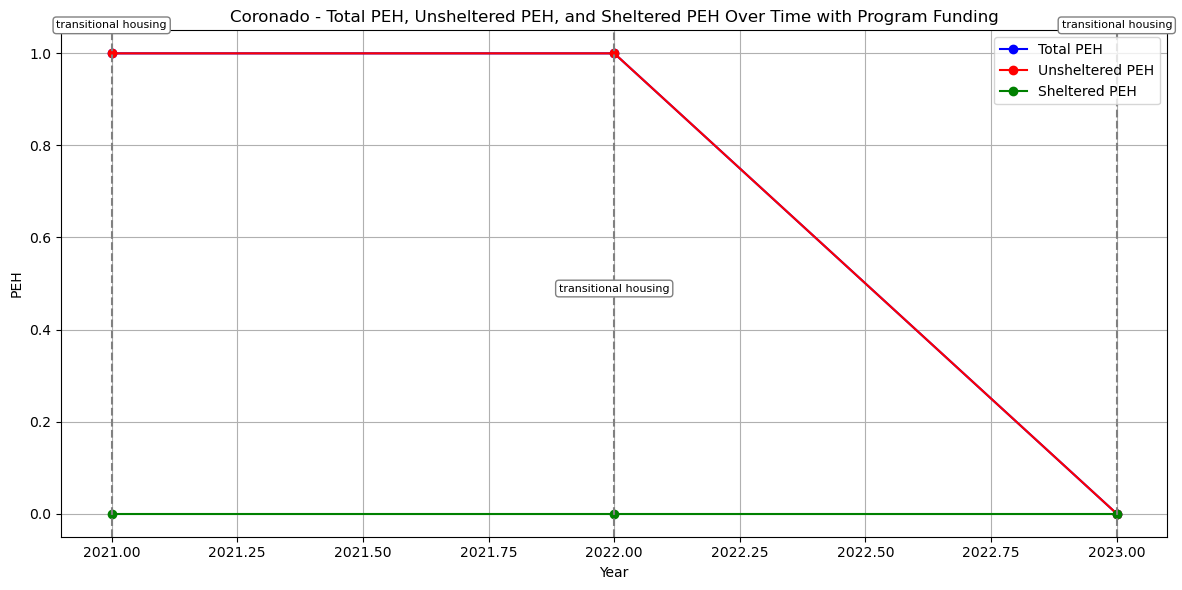

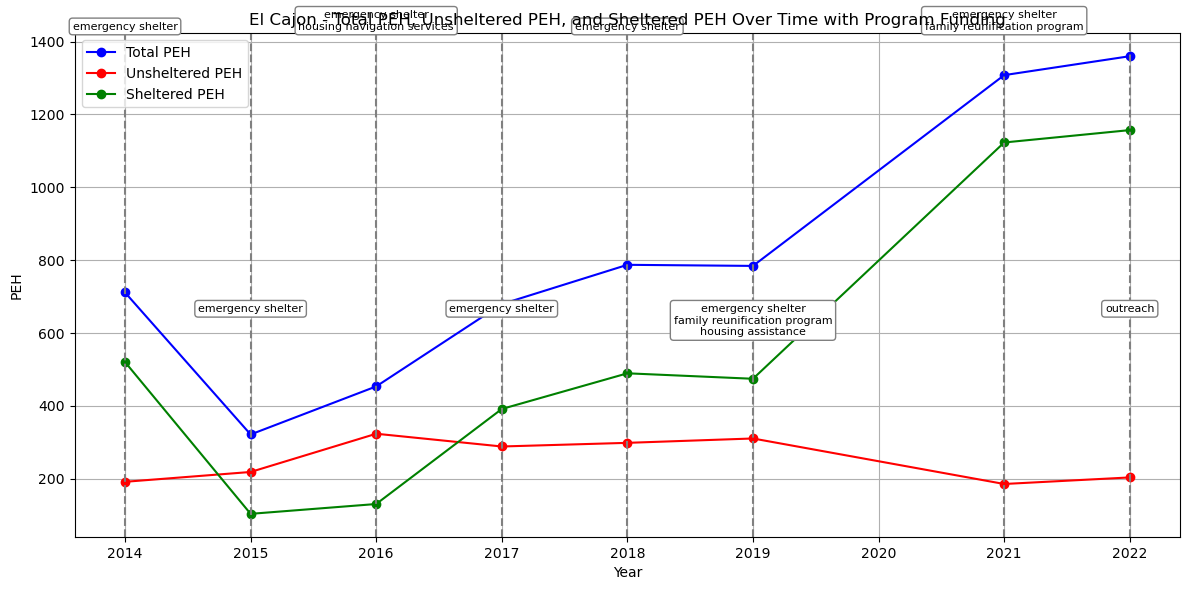

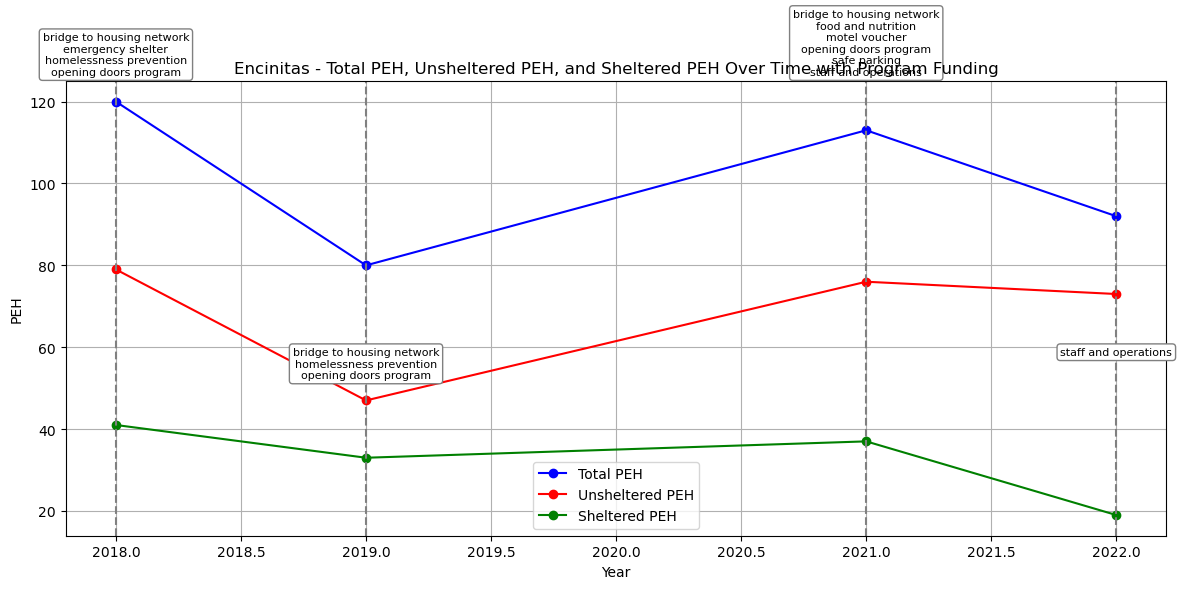

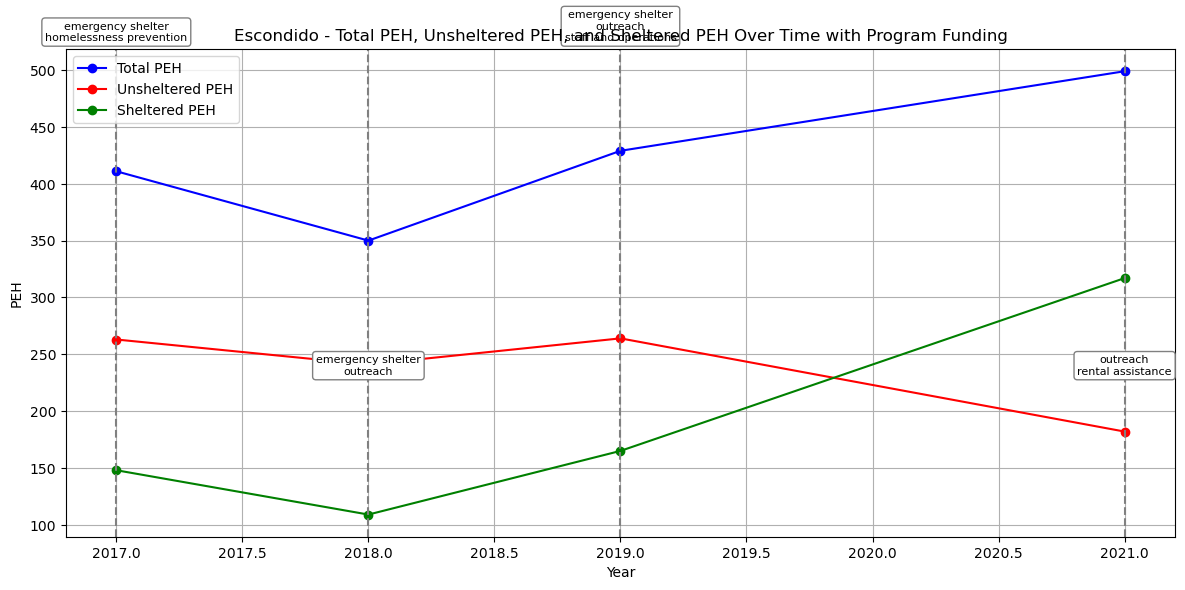

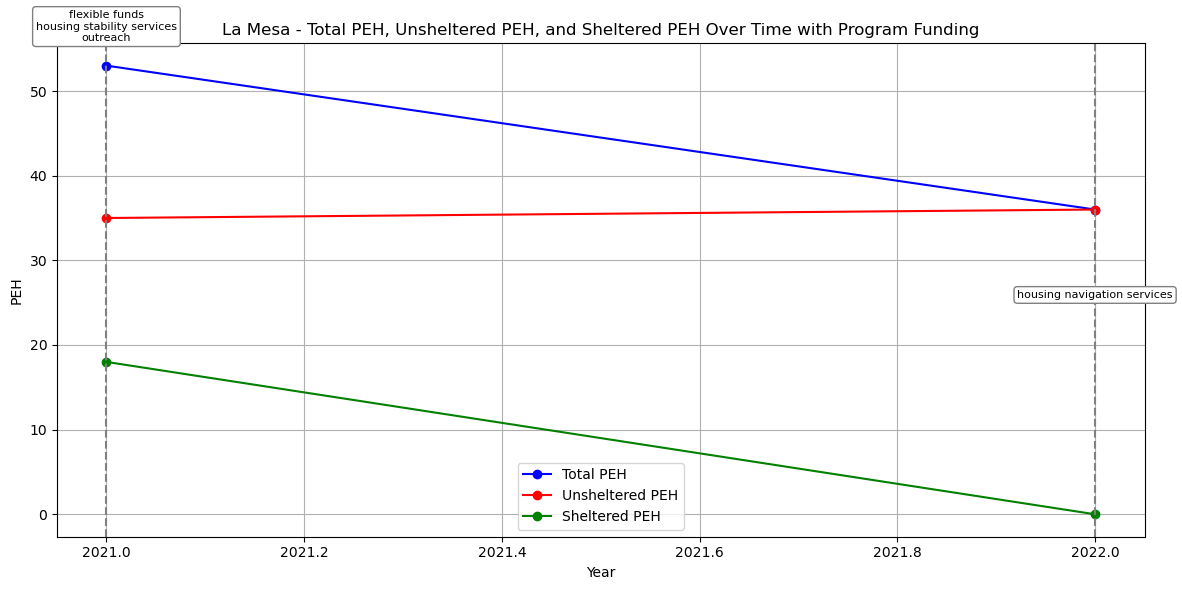

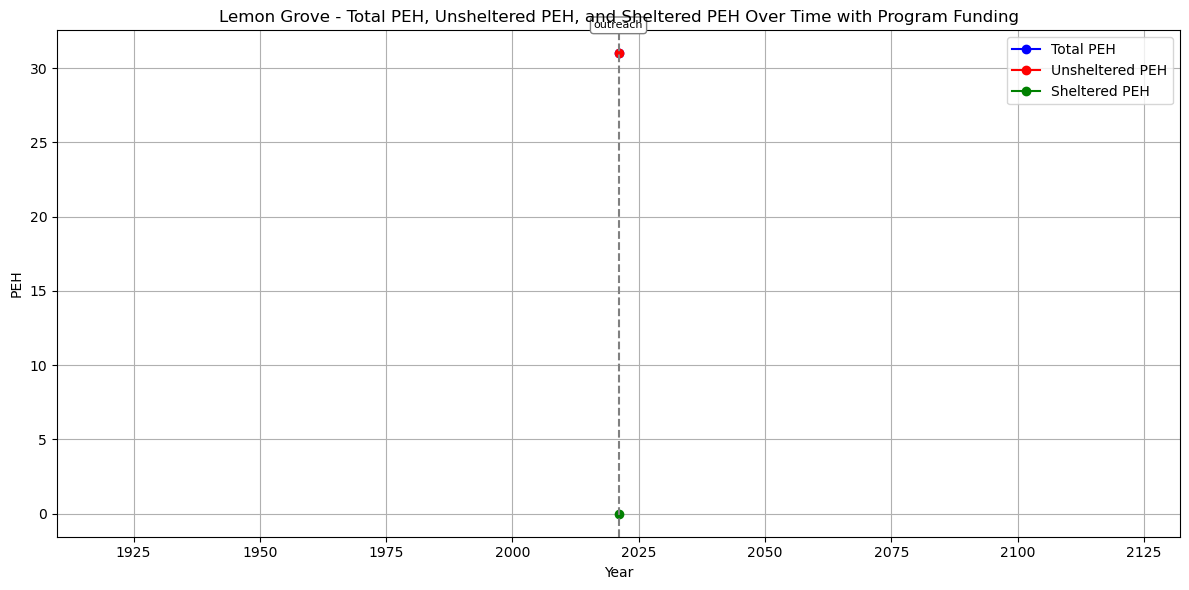

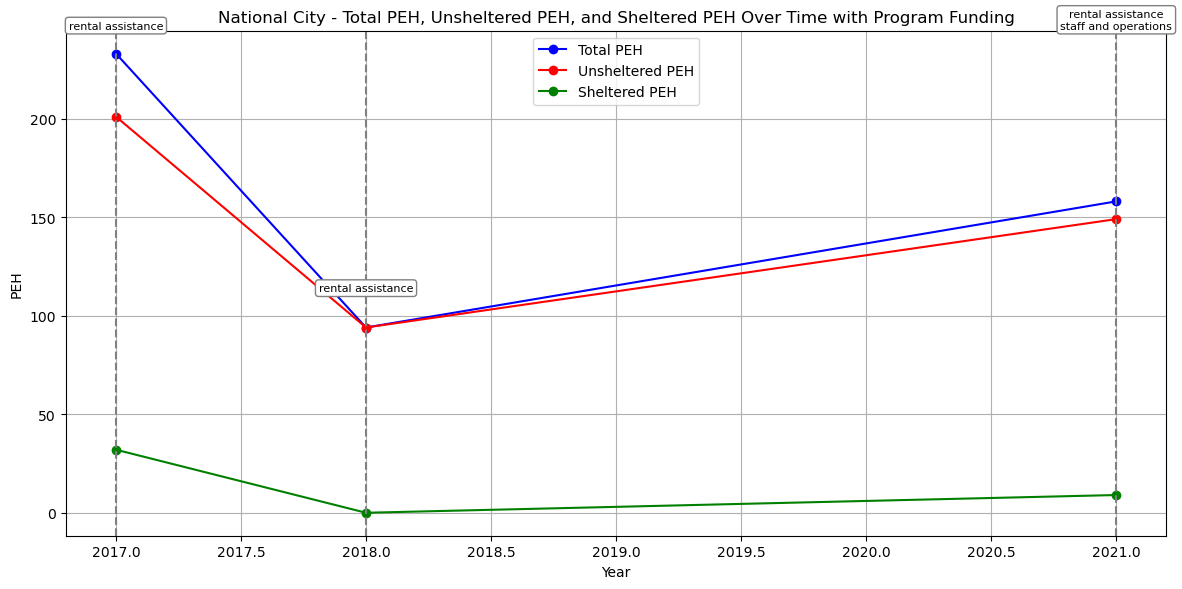

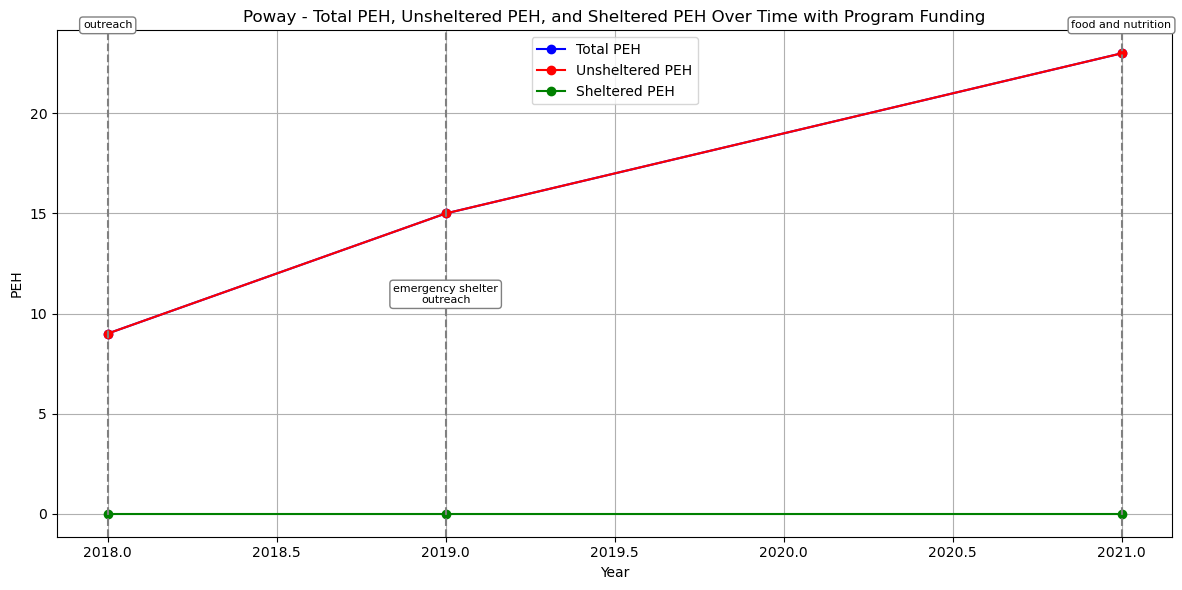

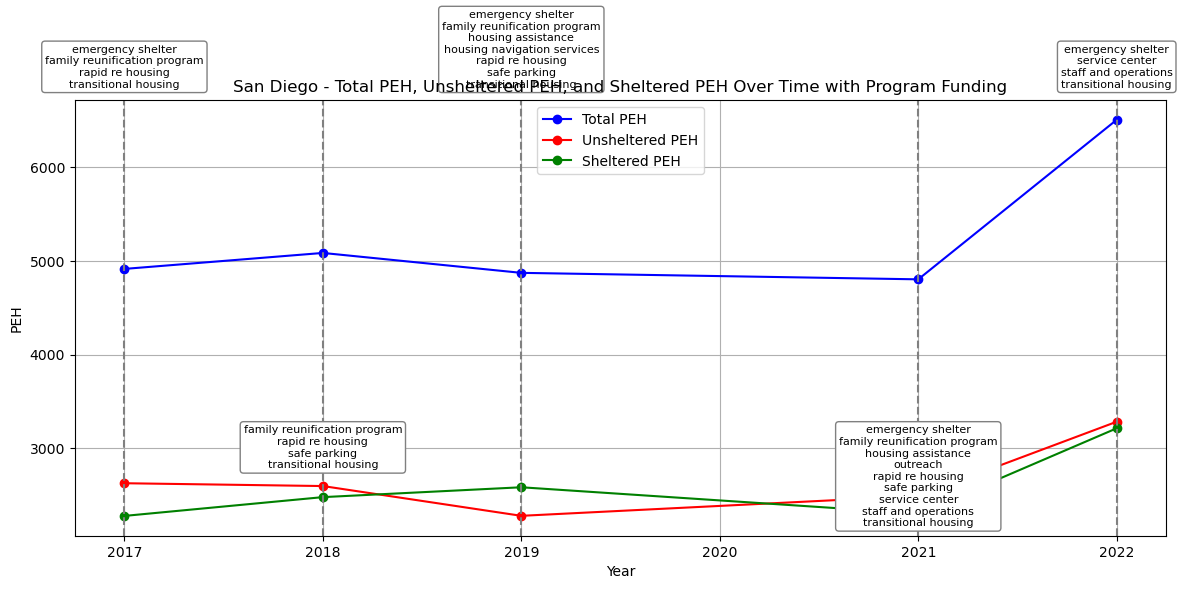

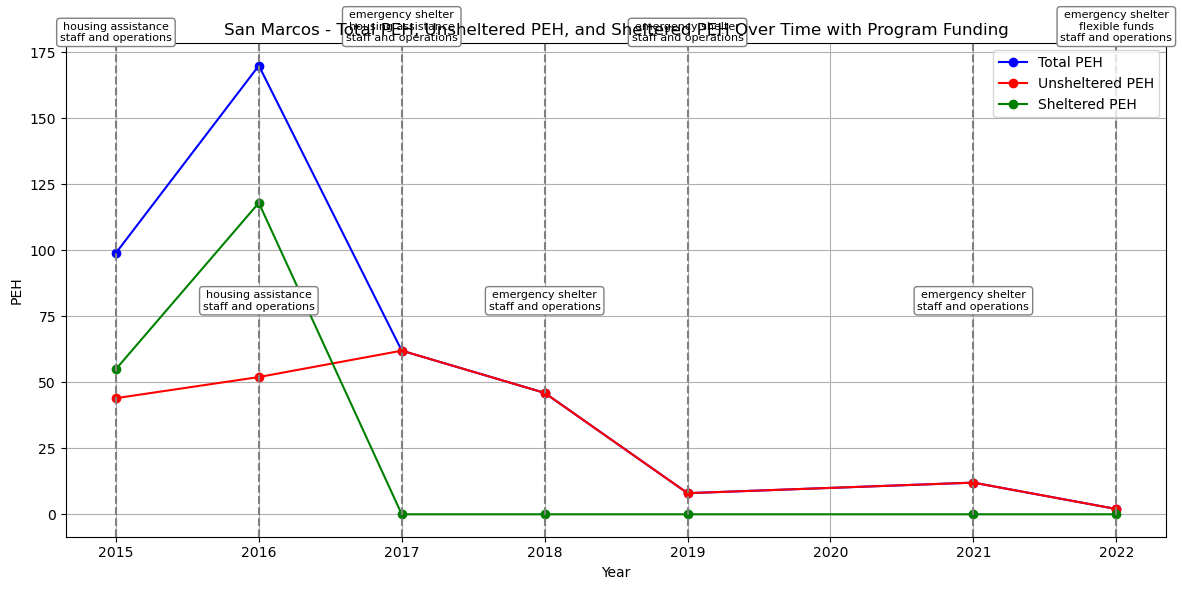

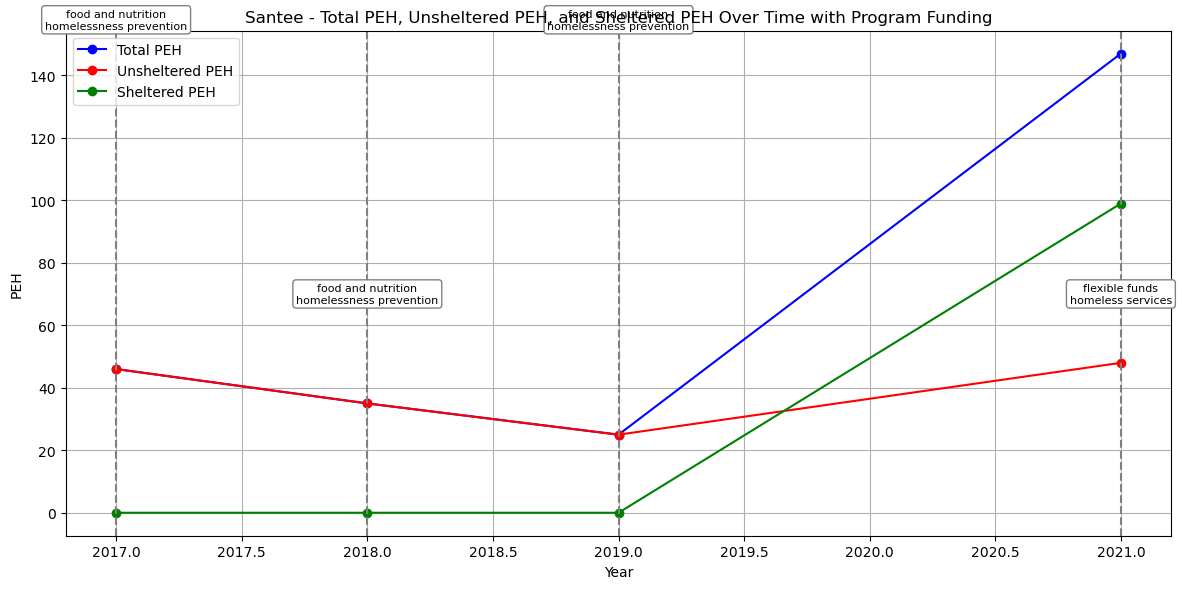

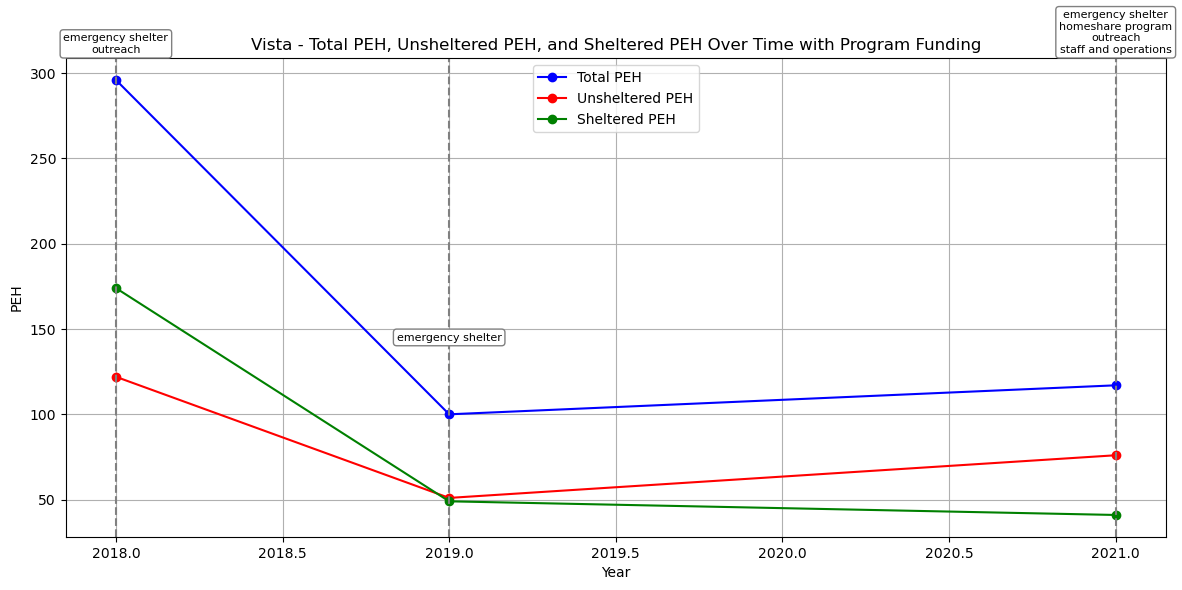

In [58]:
# Loop through each city and plot Total PEH, Unsheltered PEH, and Sheltered PEH with funding lines and boxed labels

for city in cities:
    # Filter data for the specific city
    city_data = data[data['City'] == city]
    
    # Plot Total PEH, Unsheltered PEH, and Sheltered PEH over the years for each city
    plt.figure(figsize=(12, 6))
    plt.plot(city_data['Year'], city_data['Total PEH'], label='Total PEH', marker='o', color='blue')
    plt.plot(city_data['Year'], city_data['Unsheltered PEH'], label='Unsheltered PEH', marker='o', color='red')
    plt.plot(city_data['Year'], city_data['Sheltered PEH'], label='Sheltered PEH', marker='o', color='green')
    
    # Initialize a flag to alternate label positions
    toggle_position = True
    
    # Add vertical lines and labels with a box around each program label for visibility
    for year in city_data['Year'].unique():
        funded_programs = city_data[city_data['Year'] == year][program_categories].loc[:, city_data[program_categories].loc[city_data['Year'] == year].iloc[0] > 0].columns.tolist()
        if funded_programs:
            plt.axvline(x=year, color='grey', linestyle='--')
            
            # Set label position above or below the line based on toggle
            if toggle_position:
                label_position = max(city_data['Total PEH'].max(), city_data['Unsheltered PEH'].max()) * 1.05
                vertical_alignment = 'bottom'
            else:
                label_position = max(city_data['Total PEH'].max(), city_data['Unsheltered PEH'].max()) * 0.5
                vertical_alignment = 'top'
                
            # Toggle position for the next label
            toggle_position = not toggle_position
            
            label_text = '\n'.join(funded_programs)  # Stack program names vertically
            # Add text with a bounding box
            plt.text(year, label_position, label_text,
                     rotation=0, verticalalignment=vertical_alignment, color='black', fontsize=8, ha='center', wrap=True,
                     bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.3'))
    
    # Add titles and labels
    plt.title(f'{city} - Total PEH, Unsheltered PEH, and Sheltered PEH Over Time with Program Funding')
    plt.xlabel('Year')
    plt.ylabel('PEH')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

In [49]:
# Create a new column 'Sheltered PEH' by subtracting 'Unsheltered PEH' from 'Total PEH'
data['Sheltered PEH'] = data['Total PEH'] - data['Unsheltered PEH']

# Display the first few rows to confirm the new column
data[['City', 'Year', 'Total PEH', 'Unsheltered PEH', 'Sheltered PEH']].head()


,City,Year,Total PEH,Unsheltered PEH,Sheltered PEH
0,Carlsbad,2017,210,152,58
1,Carlsbad,2018,161,102,59
2,Carlsbad,2019,148,94,54
3,Carlsbad,2021,118,75,43
4,Carlsbad,2022,103,60,43


In [60]:
# Select relevant columns for programs and sheltered PEH
program_columns = ['emergency shelter', 'transitional housing', 'rental assistance', 'homelessness prevention', 'rapid re housing', 'bridge to housing network']
data_subset = data[['Sheltered PEH'] + program_columns]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Display the correlation between Sheltered PEH and each program
correlation_matrix['Sheltered PEH'].sort_values(ascending=False)

Sheltered PEH                1.000000
transitional housing         0.814119
emergency shelter            0.732291
rapid re housing             0.464753
homelessness prevention     -0.049053
rental assistance           -0.053062
bridge to housing network   -0.080232
Name: Sheltered PEH, dtype: float64

In [88]:
# Define the formula for the model with Sheltered PEH as the dependent variable, ensuring line continuation
formula = ('Q("Sheltered PEH") ~ Q("transitional housing") + Q("family reunification program") + Q("emergency shelter") + '
           'Q("safe parking") + Q("service center") + Q("rapid re housing")')

# Fit the model using statsmodels with robust standard errors
model = smf.ols(formula, data=data).fit(cov_type='HC3')  # HC3 for robust standard errors

# Print the summary to interpret the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("Sheltered PEH")   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                    0.8545
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.535
Time:                        12:34:16   Log-Likelihood:                -388.11
No. Observations:                  56   AIC:                             790.2
Df Residuals:                      49   BIC:                             804.4
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [115]:
# Calculate Sheltered PEH as the difference between Total PEH and Unsheltered PEH
data['Sheltered PEH'] = data['Total PEH'] - data['Unsheltered PEH']

# Calculate yearly totals for Total PEH, Unsheltered PEH, Sheltered PEH, and Total Service Spending
yearly_totals = data.groupby('Year').agg({
    'Total PEH': 'sum',
    'Unsheltered PEH': 'sum',
    'Sheltered PEH': 'sum',
    'Total Service Spending': 'sum'
}).reset_index()

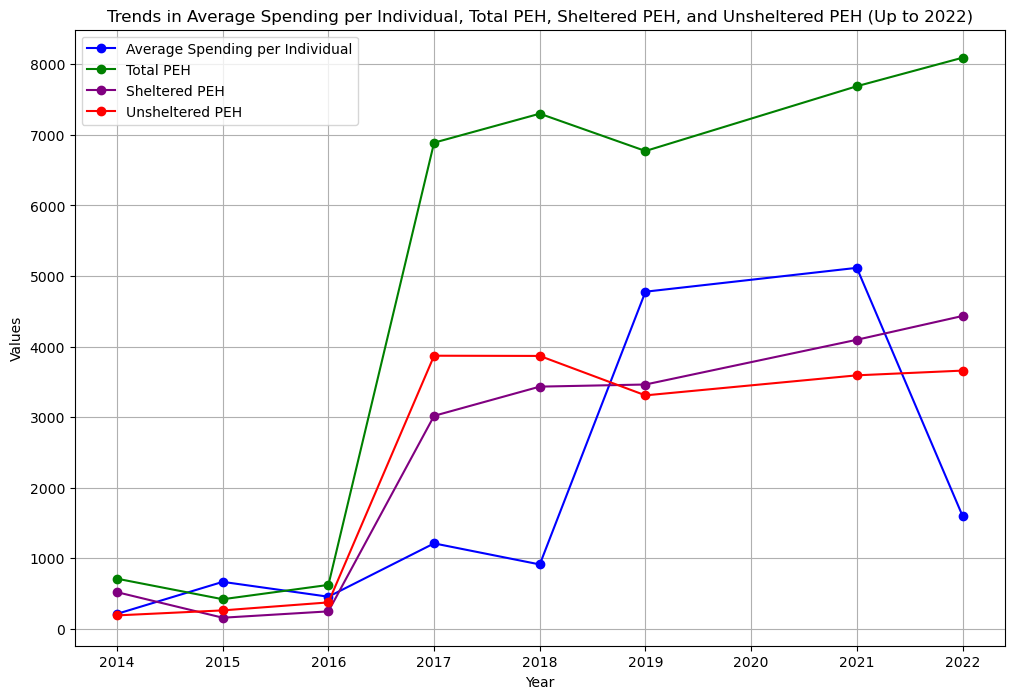

In [95]:
# Identify all service columns by excluding non-service columns
non_service_columns = ['City', 'Year', 'Population', 'Total PEH', 'Unsheltered PEH']
service_columns_all = [col for col in data.columns if col not in non_service_columns]

# Calculate Total Service Spending using all service columns
data['Total Service Spending'] = data[service_columns_all].sum(axis=1)

# Calculate Sheltered PEH as the difference between Total PEH and Unsheltered PEH
data['Sheltered PEH'] = data['Total PEH'] - data['Unsheltered PEH']

# Filter the data to include only years up to 2022
yearly_totals_filtered = yearly_totals_all_services[yearly_totals_all_services['Year'] <= 2022]

# Plotting Average Spending per Individual over time along with Total PEH, Sheltered PEH, and Unsheltered PEH, up to 2022
plt.figure(figsize=(12, 8))

# Plot Average Spending per Individual
plt.plot(yearly_totals_filtered['Year'], yearly_totals_filtered['Average Spending per Individual'], 
         marker='o', color='blue', label='Average Spending per Individual')

# Plot Total PEH, Sheltered PEH, and Unsheltered PEH on the same graph
plt.plot(yearly_totals_filtered['Year'], yearly_totals_filtered['Total PEH'], marker='o', color='green', label='Total PEH')
plt.plot(yearly_totals_filtered['Year'], yearly_totals_filtered['Sheltered PEH'], marker='o', color='purple', label='Sheltered PEH')
plt.plot(yearly_totals_filtered['Year'], yearly_totals_filtered['Unsheltered PEH'], marker='o', color='red', label='Unsheltered PEH')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trends in Average Spending per Individual in San Diego County')
plt.legend()
plt.grid(True)
plt.show()

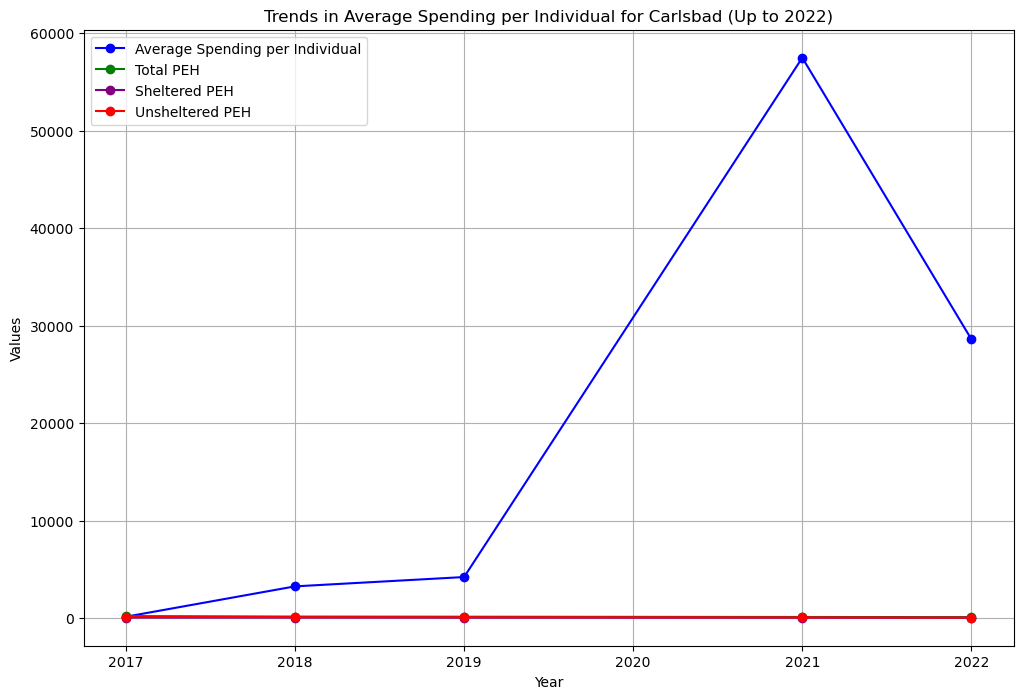

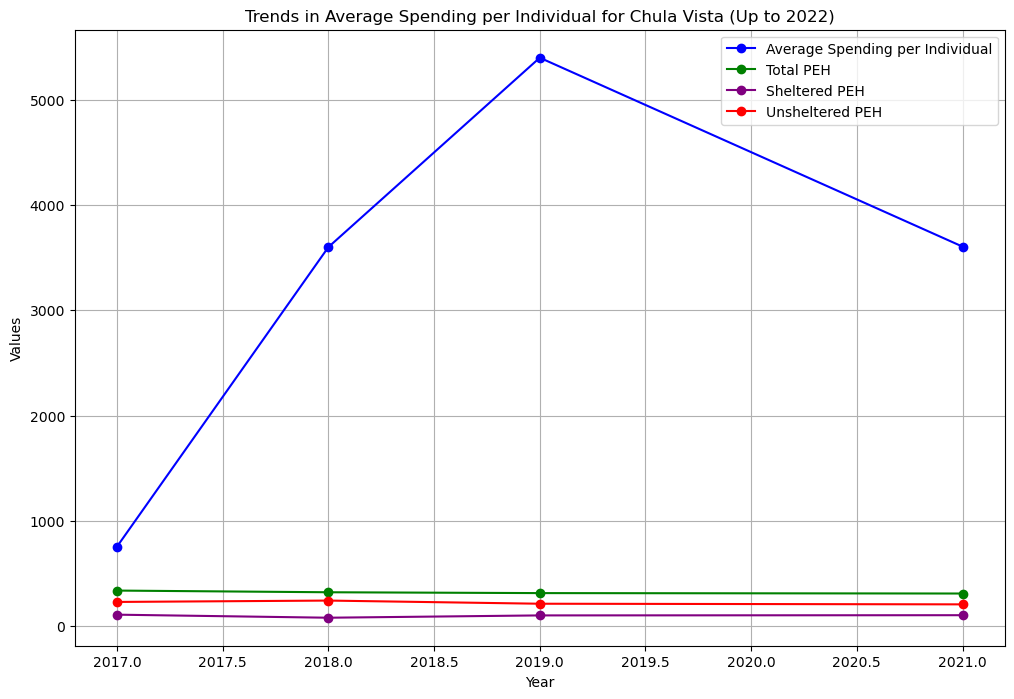

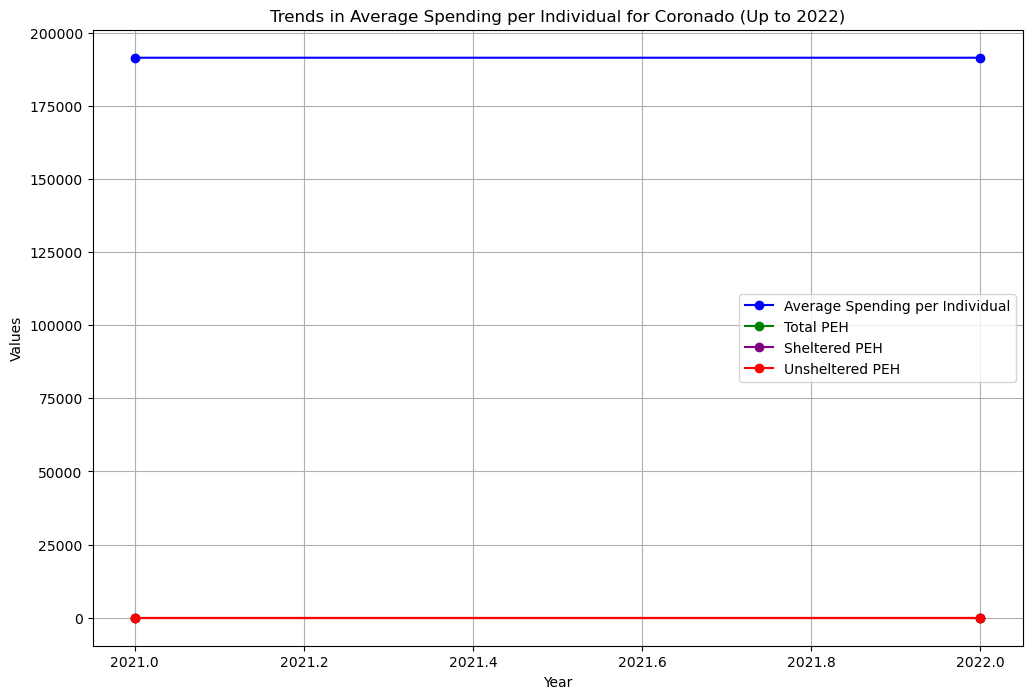

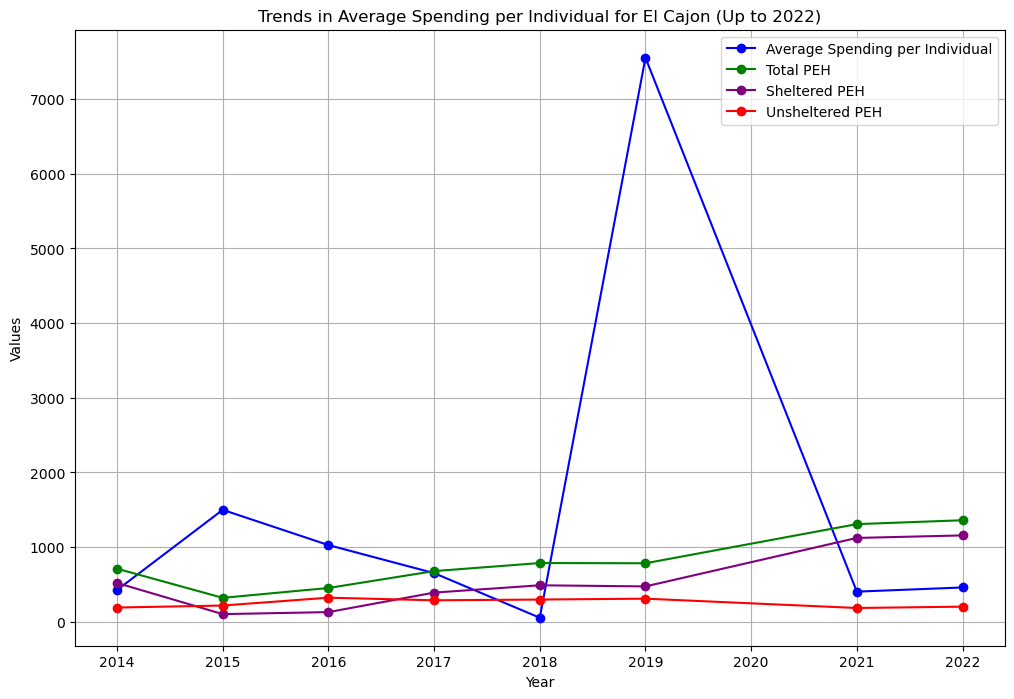

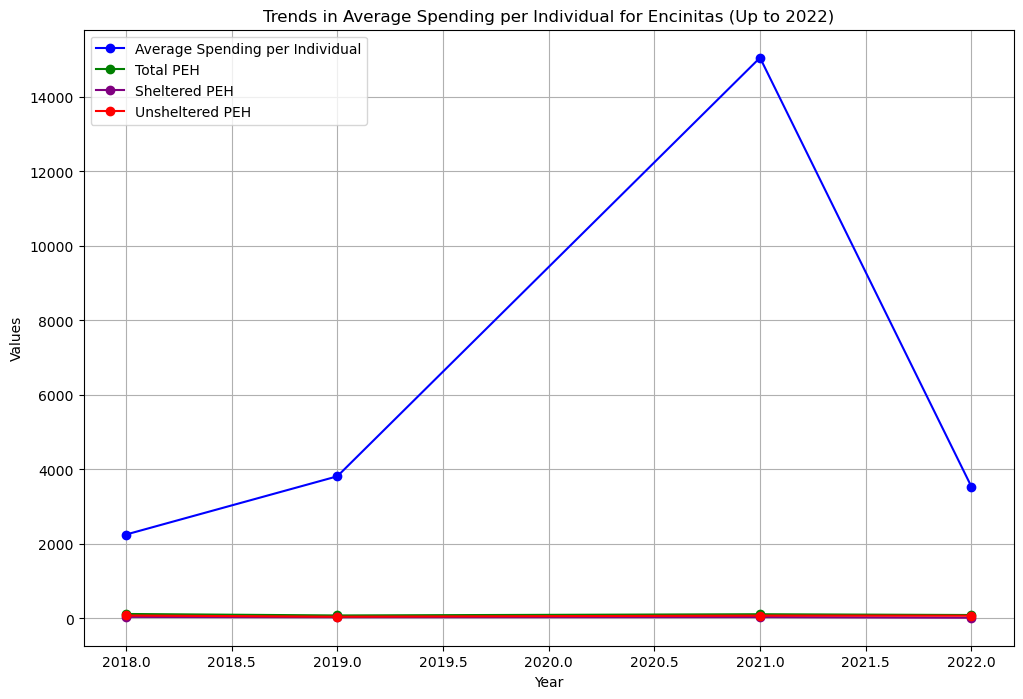

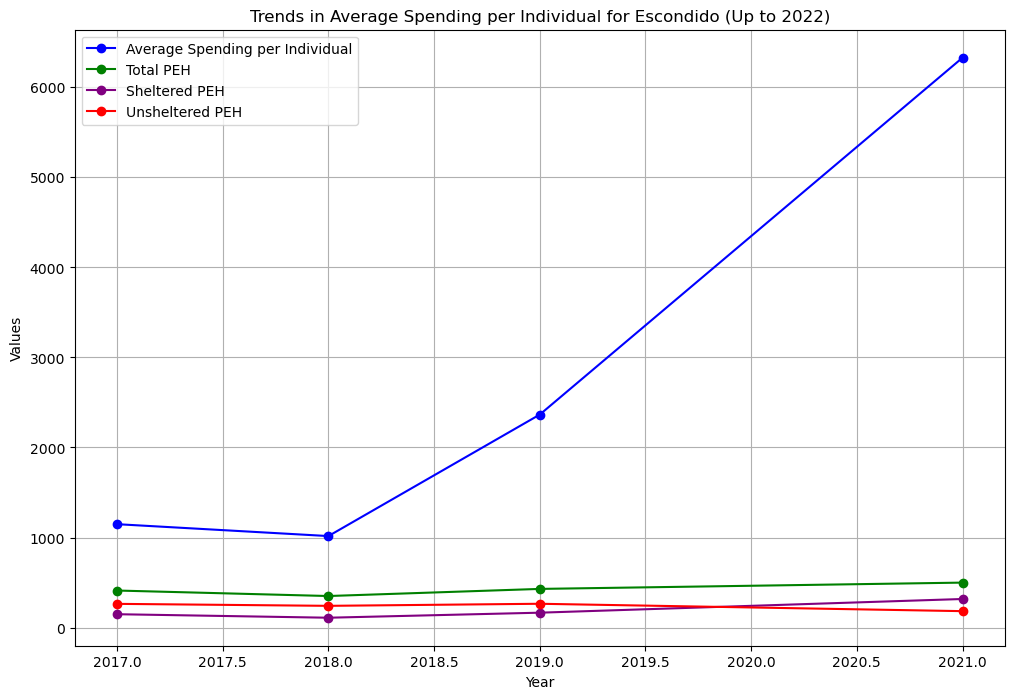

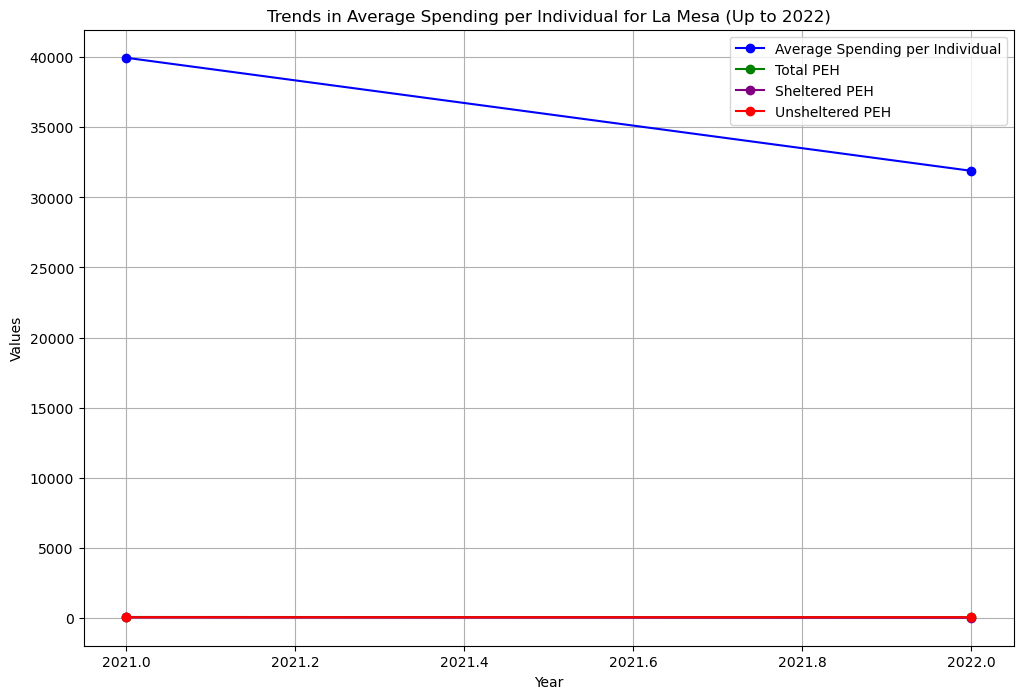

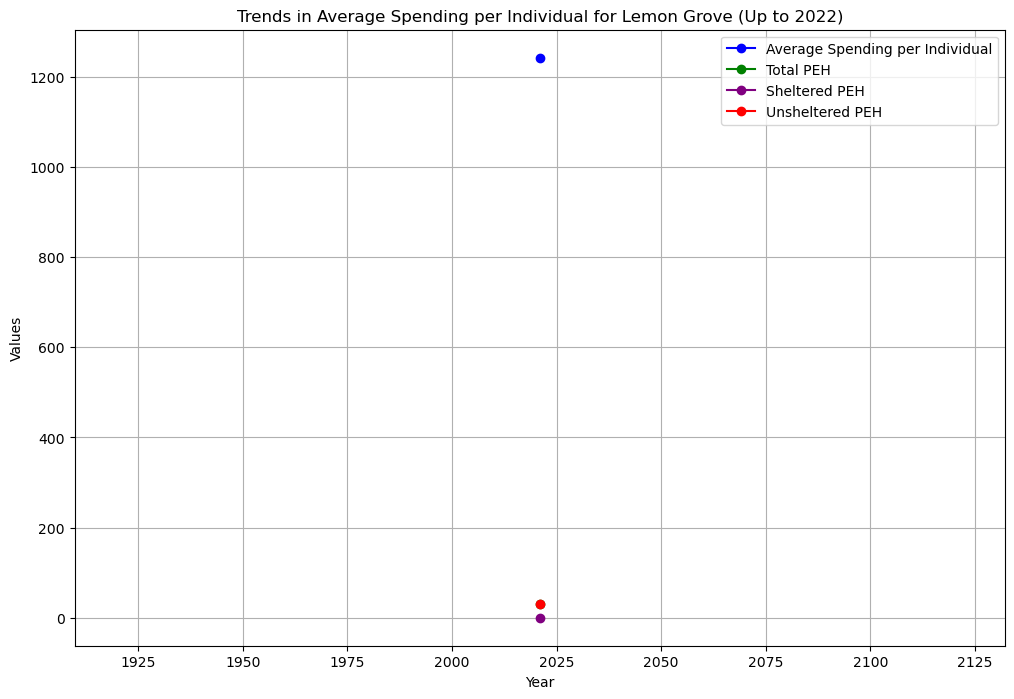

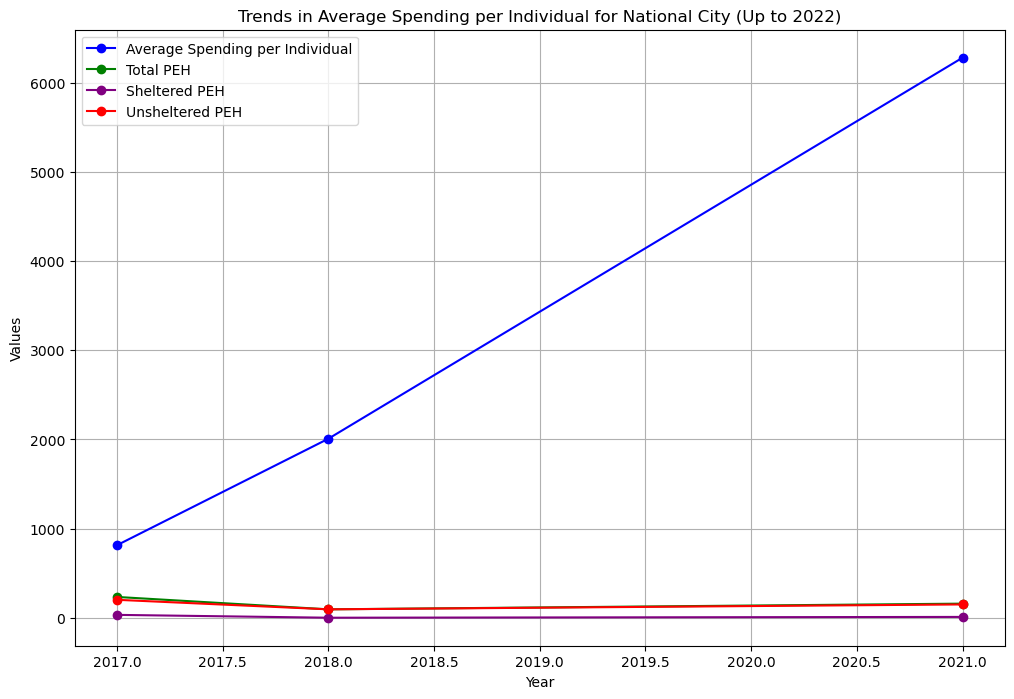

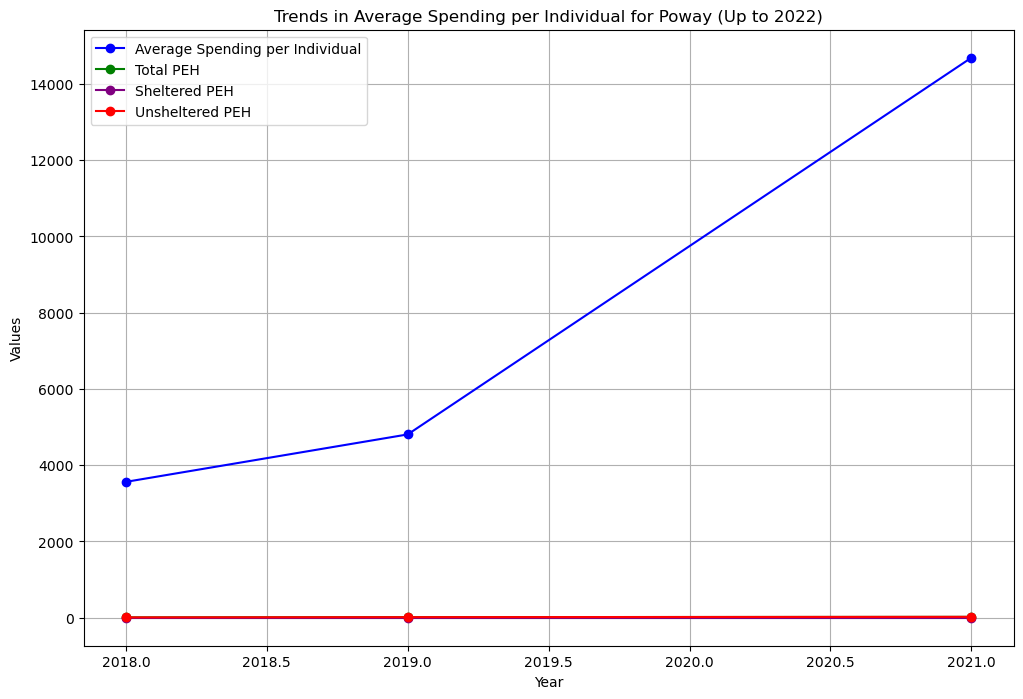

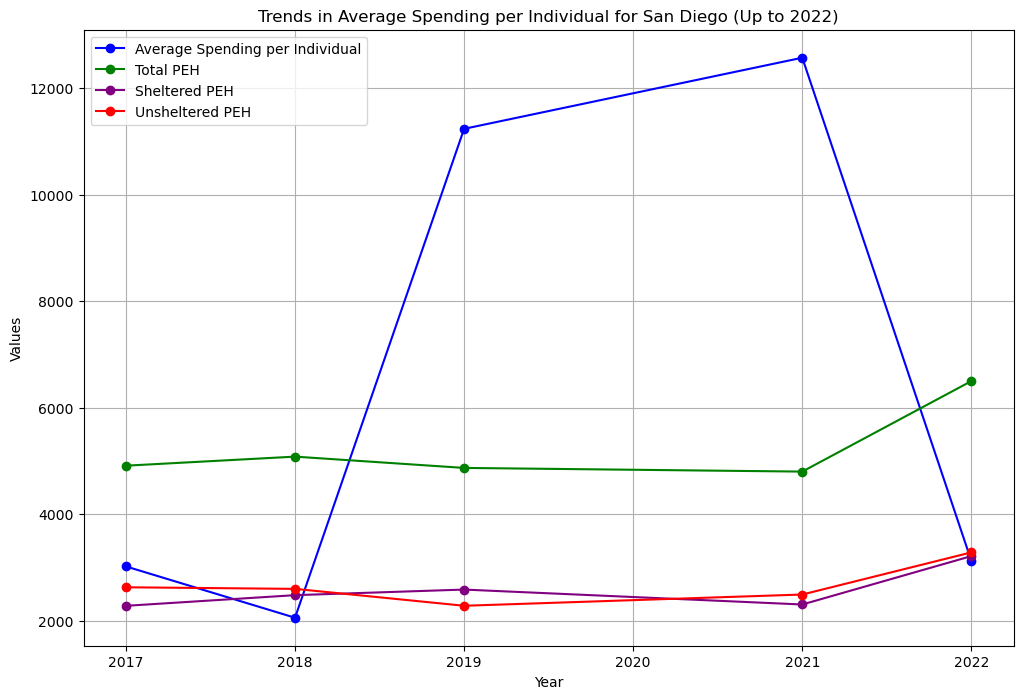

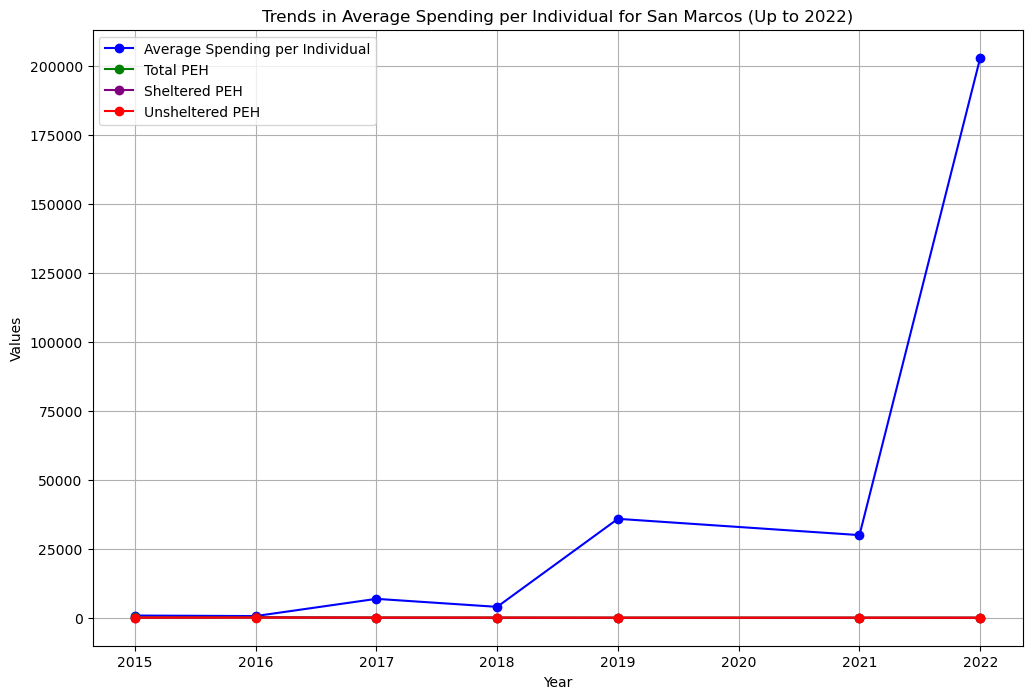

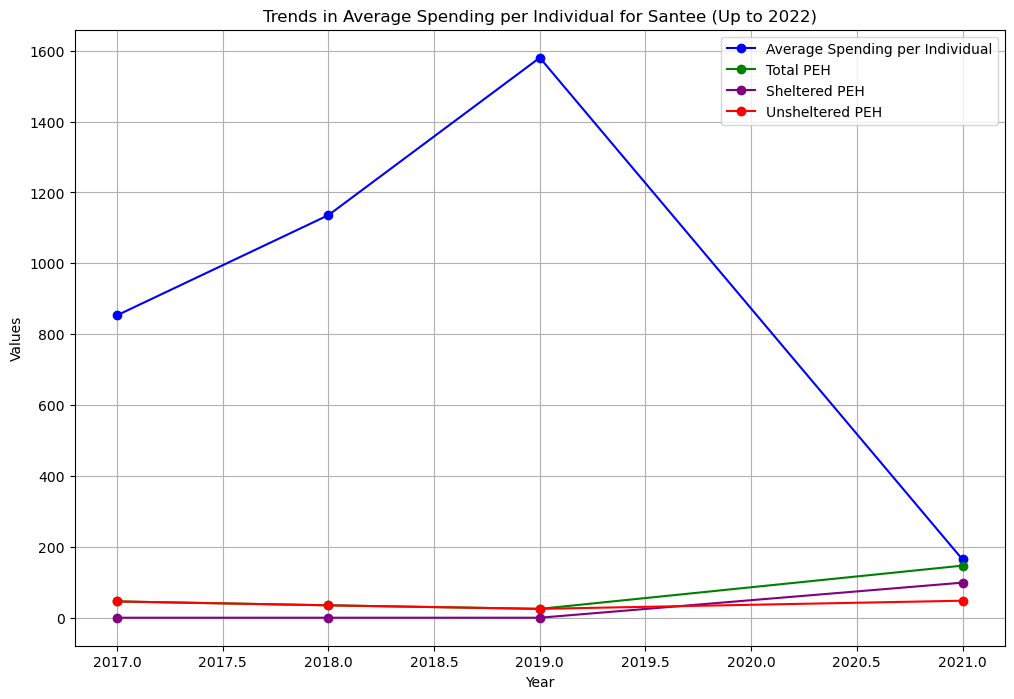

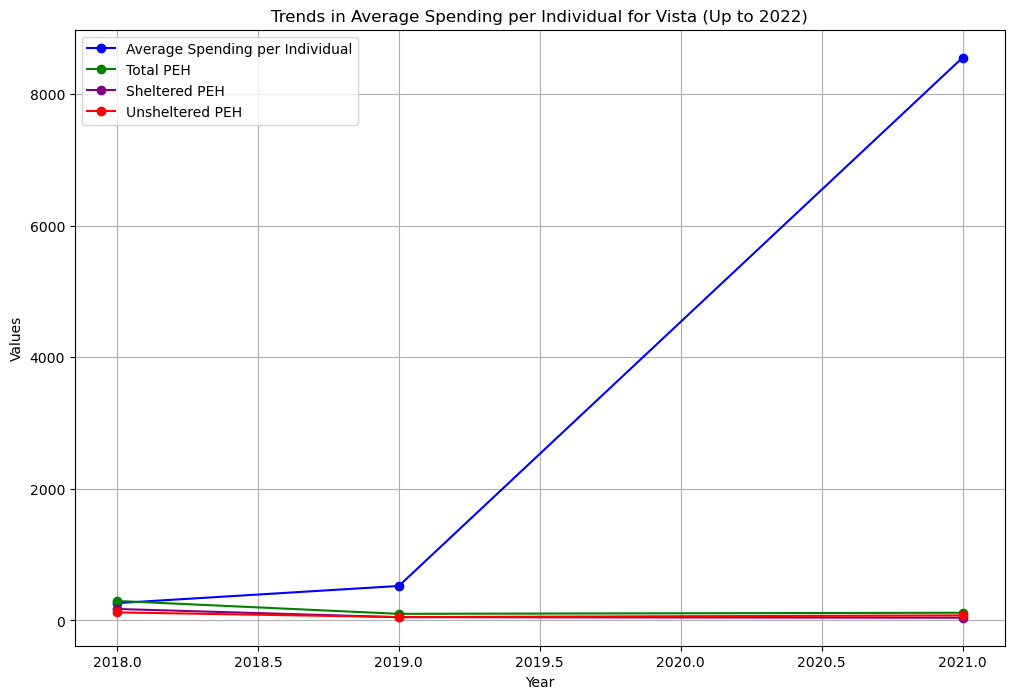

In [99]:
# Plotting trends in Average Spending per Individual, Total PEH, Sheltered PEH, and Unsheltered PEH by city up to 2022

# Filter data to include years up to 2022
data_filtered = data[data['Year'] <= 2022]

# Group the filtered data by Year and City and calculate required yearly sums for each city
city_yearly_totals = data_filtered.groupby(['City', 'Year']).agg({
    'Total PEH': 'sum',
    'Unsheltered PEH': 'sum',
    'Sheltered PEH': 'sum',
    'Total Service Spending': 'sum'
}).reset_index()

# Calculate average spending per individual for each city and year
city_yearly_totals['Average Spending per Individual'] = city_yearly_totals['Total Service Spending'] / city_yearly_totals['Total PEH']

# Plotting each city separately
cities = city_yearly_totals['City'].unique()
for city in cities:
    city_data = city_yearly_totals[city_yearly_totals['City'] == city]

    plt.figure(figsize=(12, 8))
    
    # Plot Average Spending per Individual
    plt.plot(city_data['Year'], city_data['Average Spending per Individual'], marker='o', color='blue', label='Average Spending per Individual')
    
    # Plot Total PEH, Sheltered PEH, and Unsheltered PEH
    plt.plot(city_data['Year'], city_data['Total PEH'], marker='o', color='green', label='Total PEH')
    plt.plot(city_data['Year'], city_data['Sheltered PEH'], marker='o', color='purple', label='Sheltered PEH')
    plt.plot(city_data['Year'], city_data['Unsheltered PEH'], marker='o', color='red', label='Unsheltered PEH')
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.title(f'Trends in Average Spending per Individual for {city} (Up to 2022)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [113]:
#Calculate Year-over-Year Change in Sheltered and Unsheltered PEH
data['Change in Sheltered PEH'] = data.groupby('City')['Sheltered PEH'].diff()
data['Change in Unsheltered PEH'] = data.groupby('City')['Unsheltered PEH'].diff()

#Calculate Cost per Additional Sheltered Individual
data['Cost per Sheltered Individual'] = data['Total Service Spending'] / data['Change in Sheltered PEH']
data['Cost per Unsheltered Individual'] = data['Total Service Spending'] / data['Change in Unsheltered PEH']
data = data.replace([float('inf'), -float('inf')], None)  # Replace infinities due to division

#Calculate the overall average cost per additional unsheltered individual, excluding invalid values
average_cost_per_unsheltered = data['Cost per Unsheltered Individual'].dropna().mean()

#Step 3: Correlation Analysis
shelter_programs = ['transitional housing', 'emergency shelter', 'rapid re housing']
correlations = {program: data[program].corr(data['Change in Sheltered PEH']) for program in shelter_programs}

#Display results
print("Average Cost per Additional Unsheltered Individual:", average_cost_per_unsheltered)
print("\nAverage Cost per Additional Sheltered Individual (Overall):", data['Cost per Sheltered Individual'].mean())
print("\nCorrelation with Change in Sheltered PEH:")
print(correlations)



Average Cost per Additional Unsheltered Individual: 14856.362553099596

Average Cost per Additional Sheltered Individual (Overall): 22981.461872983822

Correlation with Change in Sheltered PEH:
{'transitional housing': 0.2970876963101361, 'emergency shelter': 0.026210721971794, 'rapid re housing': 0.029401136026221485}
